# What Is Clustering ?

- Clustering is a technique used in unsupervised learning to group similar data points together based on their intrinsic characteristics or similarities. It aims to identify patterns or structures in the data without prior knowledge of the groupings or labels.

- In clustering, data points are grouped into clusters based on their proximity to each other in the feature space. The goal is to maximize the similarity within clusters and minimize the similarity between different clusters. Clustering algorithms assign data points to clusters by considering the similarity or dissimilarity between the data points' attributes or distances between them.

- Clustering is widely used in various fields, such as data mining, pattern recognition, image analysis, customer segmentation, market research, and anomaly detection. It helps in discovering hidden patterns, understanding data distributions, and organizing large datasets into meaningful groups for further analysis or decision-making.

![](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

# Business Problem

- You have been assigned as a social media analyst responsible for managing a company's social media accounts. The company aims to analyze the performance of its social media posts and achieve the best results. Therefore, you and your team are starting to examine a dataset that contains data on social media posts.

- You will use the dataset to analyze the performance of the company's social media posts. Your goal is to compare the interaction and sharing rates of different types of posts. This way, you aim to discover which types of posts can generate more engagement and shares for the company.

# Data Story

- **The dataset contains features of social media posts. Here are the explanations of the variables in the dataset:**

* **num_reactions:** Total number of reactions received by the post
* **num_comments:** Total number of comments received by the post
* **num_shares:** Number of shares of the post
* **num_likes:** Number of "likes" received by the post
* **num_loves:** Number of "loves" reactions received by the post
* **num_wows:** Number of "wows" reactions received by the post
* **num_hahas:** Number of "haha" reactions received by the post
* **num_sads:** Number of "sad" reactions received by the post
* **num_angrys:** Number of "angry" reactions received by the post
* **status_type_link:** 1 if the post contains a link, 0 otherwise
* **status_type_photo:** 1 if the post contains a photo, 0 otherwise
* **status_type_status:** 1 if the post contains text, 0 otherwise
* **status_type_video:** 1 if the post contains a video, 0 otherwise

# Road Map

- **1. Import Required Libraries**
- **2. Loading the Data Set**
- **3. Checking the Data Set Columns**
- **4. Creating a Model Object**
- **5. Model Training**
- **6. Model Predictions**
- **7. Unique Labels and their Counts**
- **8. Silhouette Analysis for Different Numbers of Clusters: KMeans Clusterin**
- **9. Creating a Model Object**
- **10. Model Training**
- **11. Model Predictions**
- **12. Unique Labels and their Counts**
- **13. Mean Number of Comments for Group Zero**
- **14. Mean Number of Comments for Group One**
- **15. Mean Number of Comments for Group Two**
- **16. Mean Number of Comments for Group Three**
- **17. Mean Number of Shares for Group Zero**
- **18. Mean Number of Shares for Group One**
- **19. Mean Number of Shares for Group Two**
- **20. Mean Number of Shares for Group Three**
- **21. Most Frequent Status Type**
- **22. Merged Dataset with Labels and Status Type**
- **23. Count of Status Types for Each Label**

# 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

warnings.simplefilter(action="ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Loading the Data Set

In [2]:
dataset = pd.read_csv("/kaggle/input/livedataset/Live.csv")


# 3. Checking the Data Set Columns

In [3]:
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


In [4]:
dataset.tail()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.0,0.006369,0.0,0.0,0.0,1.0,0.0,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
7049,0.003609,0.000000,0.000000,0.003609,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0


# 4. Creating a Model Object

In [5]:
model = KMeans(n_clusters=3)

# 5. Model Training

In [6]:
model.fit(dataset)

KMeans(n_clusters=3)

# 6. Model Predictions

In [7]:
labels = model.predict(dataset)

# 7. Unique Labels and their Counts

In [8]:
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([4288, 2334,  428]))

# 8. Silhouette Analysis for Different Numbers of Clusters: KMeans Clusterin

For n_clusters=2, The Silhouette Coefficient is 0.8188237721696822
For n_clusters=3, The Silhouette Coefficient is 0.8972493682244883
For n_clusters=4, The Silhouette Coefficient is 0.9106664962327088
For n_clusters=5, The Silhouette Coefficient is 0.8866768371183754
For n_clusters=6, The Silhouette Coefficient is 0.8430118288915796
For n_clusters=7, The Silhouette Coefficient is 0.8419421782294257
For n_clusters=8, The Silhouette Coefficient is 0.8370052625268489
For n_clusters=9, The Silhouette Coefficient is 0.7614365389055606
For n_clusters=10, The Silhouette Coefficient is 0.7252393429743081
For n_clusters=11, The Silhouette Coefficient is 0.720598215801973


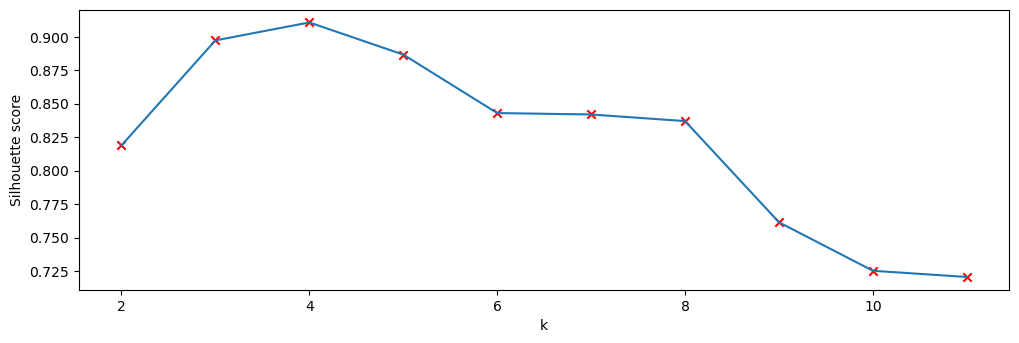

In [9]:
silhouettes = []
ks = list(range(2, 12))
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(dataset)
    label = kmeans.labels_
    sil_coeff = silhouette_score(dataset, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

plt.figure(figsize=(12, 8))    
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score');

# 9. Creating a Model Object

In [10]:
model = KMeans(n_clusters=4)

# 10. Model Training

In [11]:
model.fit(dataset)

KMeans(n_clusters=4)

# 11. Model Predictions

In [12]:
labels = model.predict(dataset)

# 12. Unique Labels and their Counts

In [13]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([4288, 2334,  365,   63]))

In [14]:
dataset["labels"] = labels

In [15]:
dataset

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,labels
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0,1
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0,1
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0,0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0


# 13. Mean Number of Comments for Group Zero

In [16]:
group_zero = dataset[dataset["labels"]==0]["num_comments"].mean()

In [17]:
group_zero

0.0007619566531325948

# 14. Mean Number of Comments for Group One

In [18]:
group_one = dataset[dataset["labels"]==1]["num_comments"].mean()

In [19]:
group_one

0.030608773182480054

# 15. Mean Number of Comments for Group Two

In [20]:
group_two = dataset[dataset["labels"]==2]["num_comments"].mean()


In [21]:
group_two

0.0017264581307471548

# 16. Mean Number of Comments for Group Three

In [22]:
group_three = dataset[dataset["labels"]==3]["num_comments"].mean()

In [23]:
group_three

0.00027148226290672723

____

# 17. Mean Number of Shares for Group Zero

In [24]:
group_zero = dataset[dataset["labels"]==0]["num_shares"].mean()

In [25]:
group_zero

0.0007458736181824375

# 18. Mean Number of Shares for Group One

In [26]:
group_one = dataset[dataset["labels"]==1]["num_shares"].mean()

In [27]:
group_one

0.033785031713235436

# 19. Mean Number of Shares for Group Two

In [28]:
group_two = dataset[dataset["labels"]==2]["num_shares"].mean()

In [29]:
group_two

0.0007473434899500528

# 20. Mean Number of Shares for Group Three

In [30]:
group_three = dataset[dataset["labels"]==3]["num_shares"].mean()

In [31]:
group_three

0.001284119566829822

# 21. Most Frequent Status Type

In [32]:
status_type = dataset[["status_type_photo", "status_type_video", "status_type_status"]].idxmax(axis=1)

# 22. Merged Dataset with Labels and Status Type

In [33]:
dataset = pd.concat([dataset["labels"],status_type.rename("status_type")], axis=1)

# 23. Count of Status Types for Each Label

In [34]:
dataset.groupby(["labels","status_type"])["status_type"].count()

labels  status_type       
0       status_type_photo     4288
1       status_type_video     2334
2       status_type_status     365
3       status_type_photo       63
Name: status_type, dtype: int64